In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')

Assignment: lab06
OK, version v1.13.11



# Lab 6: Principal Component Analysis

In this lab assignment, we will walk through an example of using Principal Component Analysis (PCA) on a dataset involving [iris plants](https://en.wikipedia.org/wiki/Iris_(plant)).

## Due Date

This assignment is due **Thursday, July 11th at 11:59pm PST**.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Collaborators:** ...

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To begin, run the following cell to load the dataset into this notebook. 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape 150 x 4). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

Additional information on the dataset will be included in the description printed at the end of the following cell.

In [3]:
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

#print(iris_data['DESCR'])
iris_target

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## Question 1

Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features. This should result in six total scatter plots in our scatter matrix.

Complete the code below using `sns.scatterplot` to create the scatter matrix.

**Hint:** Use the `hue` argument of `sns.scatterplot` to color the points by class. A legend should then appear in each scatter plot automatically.

<!--
BEGIN QUESTION
name: q1
-->

In [10]:
iris_features_dataframe=pd.DataFrame(data=iris_features)
iris_features_dataframe


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


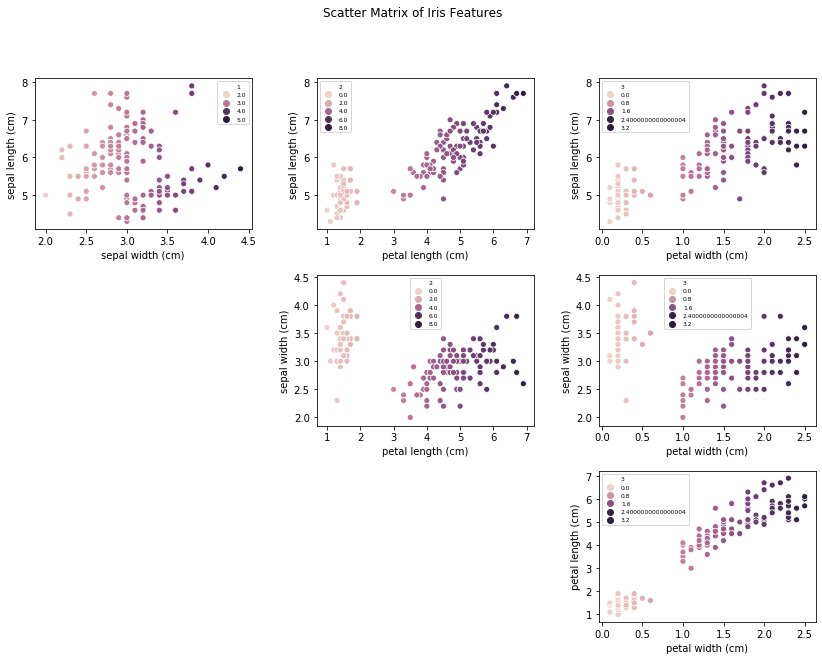

In [4]:
iris_features_dataframe=pd.DataFrame(data=iris_features)
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(1, 4):
    for j in range(i):
        plt.subplot(3, 3, i+3*j)
        sns.scatterplot(x=i,y=j,data=iris_features_dataframe,hue=i)
        plt.xlabel(iris_feature_names[i])
        plt.ylabel(iris_feature_names[j])
        plt.legend(prop={'size':6})

## Question 2a

To apply PCA, we will first need to "center" the data so that the mean of each feature is 0. Additionally, we will need to scale the centered data by $\frac{1}{\sqrt n}$, where $n$ is the number of samples (rows) we have in our dataset. 

Compute the columnwise mean of `iris_features` in the cell below and store it in `iris_mean` (should be a numpy array of 4 means, 1 for each attribute). Then, subtract `iris_mean` from `iris_features`, divide the result by the $\sqrt n$, and save the result in `normalized_features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `iris_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q2a
-->

In [12]:
n = iris_features.shape[0] # should be 150
n

150

In [13]:
np.mean(iris_features,axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [18]:
import math

(iris_features-np.mean(iris_features,axis=0))/math.sqrt(n)

array([[-6.06929125e-02,  3.64157475e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-7.70228441e-02, -4.40908154e-03, -1.92584327e-01,
        -8.15407919e-02],
       [-9.33527758e-02,  1.19208501e-02, -2.00749293e-01,
        -8.15407919e-02],
       [-1.01517742e-01,  3.75588427e-03, -1.84419361e-01,
        -8.15407919e-02],
       [-6.88578783e-02,  4.45807133e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-3.61980151e-02,  6.90756107e-02, -1.68089429e-01,
        -6.52108603e-02],
       [-1.01517742e-01,  2.82507817e-02, -1.92584327e-01,
        -7.33758261e-02],
       [-6.88578783e-02,  2.82507817e-02, -1.84419361e-01,
        -8.15407919e-02],
       [-1.17847673e-01, -1.25740473e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-7.70228441e-02,  3.75588427e-03, -1.84419361e-01,
        -8.97057577e-02],
       [-3.61980151e-02,  5.27456791e-02, -1.84419361e-01,
        -8.15407919e-02],
       [-8.51878099e-02,  2.82507817e-02, -1.76254395e-01,
      

In [19]:
import math
n = iris_features.shape[0] # should be 150
iris_mean = np.mean(iris_features,axis=0)
normalized_features = (iris_features-np.mean(iris_features,axis=0))/math.sqrt(n)

In [20]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



In [21]:
normalized_features

array([[-6.06929125e-02,  3.64157475e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-7.70228441e-02, -4.40908154e-03, -1.92584327e-01,
        -8.15407919e-02],
       [-9.33527758e-02,  1.19208501e-02, -2.00749293e-01,
        -8.15407919e-02],
       [-1.01517742e-01,  3.75588427e-03, -1.84419361e-01,
        -8.15407919e-02],
       [-6.88578783e-02,  4.45807133e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-3.61980151e-02,  6.90756107e-02, -1.68089429e-01,
        -6.52108603e-02],
       [-1.01517742e-01,  2.82507817e-02, -1.92584327e-01,
        -7.33758261e-02],
       [-6.88578783e-02,  2.82507817e-02, -1.84419361e-01,
        -8.15407919e-02],
       [-1.17847673e-01, -1.25740473e-02, -1.92584327e-01,
        -8.15407919e-02],
       [-7.70228441e-02,  3.75588427e-03, -1.84419361e-01,
        -8.97057577e-02],
       [-3.61980151e-02,  5.27456791e-02, -1.84419361e-01,
        -8.15407919e-02],
       [-8.51878099e-02,  2.82507817e-02, -1.76254395e-01,
      

## Question 2b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function compute the SVD of our `normalized_features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt` respectively.

**Hint:** Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q2b
-->

In [23]:
u, s, vt=np.linalg.svd(normalized_features,full_matrices=False)
u.shape, s, vt.shape

((150, 4), array([2.04857882, 0.49053911, 0.27928554, 0.15337907]), (4, 4))

In [28]:
u

array([[-1.06983726e-01, -5.43634040e-02,  6.28902631e-03,
         5.35616709e-04],
       [-1.08226598e-01,  2.82225381e-02,  5.94998742e-02,
         5.30222518e-02],
       [-1.15178765e-01,  2.28610154e-02, -7.22379342e-03,
         1.02765604e-02],
       [-1.09464013e-01,  5.17862770e-02, -1.10134734e-02,
        -4.04339523e-02],
       [-1.08752801e-01, -5.55813514e-02, -2.81329351e-02,
        -3.36058845e-02],
       [-9.08692595e-02, -1.24467554e-01, -5.09644250e-02,
        -1.44513015e-02],
       [-1.12431486e-01,  1.36661994e-02, -7.72543054e-02,
        -2.66699828e-02],
       [-1.04682991e-01, -2.83637702e-02,  4.61960146e-03,
        -2.46375849e-02],
       [-1.15104592e-01,  9.50086611e-02, -7.99155777e-03,
        -1.41684222e-02],
       [-1.06570713e-01,  1.77587088e-02,  5.59951231e-02,
        -2.97529392e-02],
       [-9.99019680e-02, -1.08513817e-01,  2.02526763e-02,
        -8.84121753e-03],
       [-1.04151331e-01, -3.58208392e-03, -3.14717847e-02,
      

In [25]:
s

array([2.04857882, 0.49053911, 0.27928554, 0.15337907])

array([[ 1.00000000e+00,  1.46256493e-16, -9.98854629e-18,
        -2.57951623e-17],
       [ 1.46256493e-16,  1.00000000e+00,  2.14526471e-17,
        -4.79975009e-17],
       [-9.98854629e-18,  2.14526471e-17,  1.00000000e+00,
         1.09096941e-16],
       [-2.57951623e-17, -4.79975009e-17,  1.09096941e-16,
         1.00000000e+00]])

In [9]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2c

What can we learn from the singular values in `s`? First, we can compute the total variance of the data by summing the squared singular values. We will later be able to use this value to determine the variance captured by a subset of our principal components.

Compute the total variance below by summing the square of `s` and store the result in the variable `total_variance`.

<!--
BEGIN QUESTION
name: q2c
-->

In [30]:
total_variance = sum(np.square(s))
print("total_variance: {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(iris_features, axis=0))))

total_variance: 4.539 should approximately equal the sum of feature variances: 4.539


In [11]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 3a

Let's now use only the first two principal components to see what a 2D version of our iris data looks like.

First, construct the 2D version of the iris data by matrix-multiplying our `normalized_features` by the first two right singular vectors in `v`. This will project the iris data down from a 4D subspace to a 2D subspace, and the first two right singular vectors are directions for the first two principal components.

**Hints:**
* To matrix multiply two numpy arrays, use @ or np.dot.
* The first two right singular vectors in `v` will be the first two columns of `v`, or the first two rows of `vt` (transposed to be column vectors instead of row vectors). 
* Since we want to obtain a 2D version of our iris dataset, the shape of `iris_2d` should be (150, 2).

<!--
BEGIN QUESTION
name: q3a
-->

In [31]:
vt_two_rows=vt[:2,:].T
iris_2d = normalized_features @ vt_two_rows

In [32]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

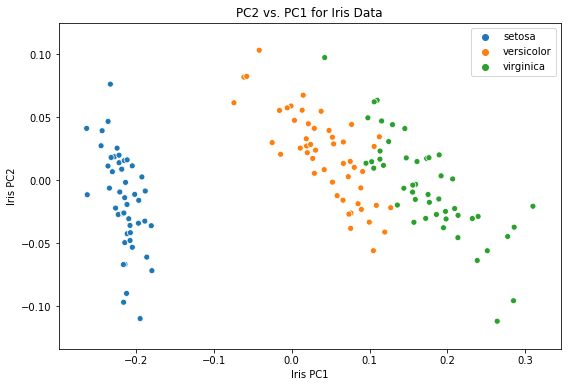

In [33]:
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(iris_2d[:, 0], iris_2d[:, 1], hue=iris_target);

## Question 3b

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three iris types?

<!--
BEGIN QUESTION
name: q3b
-->

*Write your answer here, replacing this text.*

## Question 3c

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? Compute this quantity in the cell below by dividing the sum of the first two squared singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. Store the result in `two_dim_variance`.

<!--
BEGIN QUESTION
name: q3c
-->

In [35]:
s[:2]

array([2.04857882, 0.49053911])

In [36]:
two_dim_variance =sum(np.square(s[:2]))/total_variance
two_dim_variance

0.9776317750248031

In [37]:
ok.grade("q3c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 4

As a last step, let's create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each of each principal component. In the cell below, create a scree plot by plotting a line plot of the square of the singular values in `s` vs. the principal component number (1st, 2nd, 3rd, or 4th).

<img src="scree.png" width="400px" />

<!--
BEGIN QUESTION
name: q4
-->

In [38]:
np.square(s)

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

Text(0.5, 1.0, 'Scree Plot of Iris Principal Components')

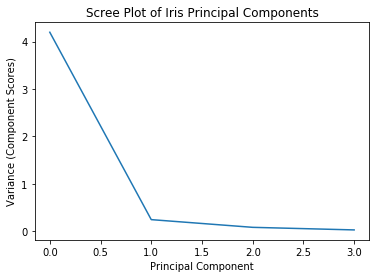

In [39]:
plt.plot(np.square(s))
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title('Scree Plot of Iris Principal Components')        

### You have completed Lab 6!

### Midterm Review on Monday (July 15th), during Lecture & Discussion.
### Midterm reference sheet is up on Piazza. Make sure you check it before writing your own cheatsheet. 

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>